In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
# from keras.models import Sequential
# from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-06 19:30:26.122275: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 19:30:26.587915: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 19:30:26.587972: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 19:30:26.589912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already b

In [2]:
df_hujan = pd.read_csv('Dataset/curah hujan baru.csv')
df_yield = pd.read_csv('Dataset/hasil panen.csv')

In [3]:
df_yield

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg)
0,2013,Januari,38111.0,15.00,9030.00
1,2013,Februari,38111.0,1948.00,1176787.00
2,2013,Maret,38111.0,24877.00,15172482.00
3,2013,April,38111.0,5218.00,3209592.00
4,2013,Mei,38111.0,671.00,398373.00
...,...,...,...,...,...
115,2022,Agustus,37637.4,2254.27,14655.14
116,2022,September,37637.4,1053.19,6836.77
117,2022,Oktober,37637.4,3522.05,22863.35
118,2022,November,37637.4,1279.25,8304.24


In [4]:
## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
# df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
# df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

# df_panen_baru.info()

In [5]:
# data = df_panen_baru

In [6]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2013,Januari,38111.0,15.00,9030.00,343.7
1,2013,Februari,38111.0,1948.00,1176787.00,201.1
2,2013,Maret,38111.0,24877.00,15172482.00,262.8
3,2013,April,38111.0,5218.00,3209592.00,197.2
4,2013,Mei,38111.0,671.00,398373.00,206.7
...,...,...,...,...,...,...
115,2022,Agustus,37637.4,2254.27,14655.14,514.0
116,2022,September,37637.4,1053.19,6836.77,243.0
117,2022,Oktober,37637.4,3522.05,22863.35,376.0
118,2022,November,37637.4,1279.25,8304.24,526.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    120 non-null    int64  
 1   Bulan                    120 non-null    object 
 2   Luas Lahan               120 non-null    float64
 3   Luas Panen (ha)          120 non-null    float64
 4   Produksi Padi (ton/gkg)  120 non-null    float64
 5   curah hujan (mm)         120 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [9]:
data['Bulan'] = data['Bulan'].map(month_mapping)

In [10]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2013,1,38111.0,15.00,9030.00,343.7
1,2013,2,38111.0,1948.00,1176787.00,201.1
2,2013,3,38111.0,24877.00,15172482.00,262.8
3,2013,4,38111.0,5218.00,3209592.00,197.2
4,2013,5,38111.0,671.00,398373.00,206.7
...,...,...,...,...,...,...
115,2022,8,37637.4,2254.27,14655.14,514.0
116,2022,9,37637.4,1053.19,6836.77,243.0
117,2022,10,37637.4,3522.05,22863.35,376.0
118,2022,11,37637.4,1279.25,8304.24,526.0


In [11]:
columns_to_drop = ['Tahun']
data = data.drop(columns_to_drop, axis=1)
print(data)

     Bulan  Luas Lahan  Luas Panen (ha)  Produksi Padi (ton/gkg)  \
0        1     38111.0            15.00                  9030.00   
1        2     38111.0          1948.00               1176787.00   
2        3     38111.0         24877.00              15172482.00   
3        4     38111.0          5218.00               3209592.00   
4        5     38111.0           671.00                398373.00   
..     ...         ...              ...                      ...   
115      8     37637.4          2254.27                 14655.14   
116      9     37637.4          1053.19                  6836.77   
117     10     37637.4          3522.05                 22863.35   
118     11     37637.4          1279.25                  8304.24   
119     12     37637.4           262.36                  1703.11   

     curah hujan (mm)  
0               343.7  
1               201.1  
2               262.8  
3               197.2  
4               206.7  
..                ...  
115            

In [12]:
# # Remove Outlier
# from scipy import stats

# y = data['Produksi Padi (ton/gkg)']
# X = data.drop('Produksi Padi (ton/gkg)', axis=1)

# z_scores = stats.zscore(X)
# abs_z_scores = np.abs(z_scores)

# filtered_entries = (abs_z_scores < 11).all(axis=1)
# X = X[filtered_entries]

# X.insert(len(X.columns), 'Produksi Padi (ton/gkg)', y)
# data = X

In [13]:
## Parameter/Fitur
X = data[['Bulan', 'curah hujan (mm)', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton/gkg)']

In [14]:
# #Min Max
# from sklearn.preprocessing import MinMaxScaler

# y = data['Produksi Padi (ton/gkg)']
# X = data.drop('Produksi Padi (ton/gkg)', axis=1)

# scaler = MinMaxScaler()
# data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
# data_without_yield.columns = X.columns
# data_without_yield.insert(len(data_without_yield.columns), 'Produksi Padi (ton/gkg)', y)

# data = data_without_yield
# print (data)

# Standard scaler
# from sklearn.preprocessing import StandardScaler

# y = data['Produksi Padi (ton/gkg)']
# X = data.drop('Produksi Padi (ton/gkg)', axis=1)

# scaler = StandardScaler()
# data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
# data_without_yield.columns = X.columns
# data_without_yield.insert(len(data_without_yield.columns), 'Produksi Padi (ton/gkg)', y)

# data = data_without_yield
# print (data)

In [15]:
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,1,38111.0,15.00,9030.00,343.7
1,2,38111.0,1948.00,1176787.00,201.1
2,3,38111.0,24877.00,15172482.00,262.8
3,4,38111.0,5218.00,3209592.00,197.2
4,5,38111.0,671.00,398373.00,206.7
...,...,...,...,...,...
115,8,37637.4,2254.27,14655.14,514.0
116,9,37637.4,1053.19,6836.77,243.0
117,10,37637.4,3522.05,22863.35,376.0
118,11,37637.4,1279.25,8304.24,526.0


In [16]:
# pembagian data
n_split = int(len(X) * .8)
X = data.iloc [:n_split, :-2].values
y= data.iloc [:n_split, -2].values
Xtest=data.iloc[n_split:, :-2].values
ytest=data.iloc[n_split:, -2].values

In [17]:
# data.iloc[:, 3:4]

In [18]:
ytest

array([  2514.4 ,  38615.05,  90703.72,  23672.07,   5377.67,  95596.82,
        37155.99,  12286.86,   3529.16,  20564.27,  10208.79,   2118.79,
          618.63, 102194.51,  90703.72,  13965.33,  14177.11, 107551.27,
        27669.02,  14655.14,   6836.77,  22863.35,   8304.24,   1703.11])

In [19]:
model = SVR(kernel='linear')
model.fit(X,y)
pred=model.predict(Xtest)

In [20]:
pred

array([1.61128668e+04, 4.11219728e+04, 9.20325854e+04, 2.50072670e+04,
       5.27612263e+03, 1.02774408e+05, 3.96290797e+04, 1.27616970e+04,
       3.02462850e+03, 2.00884739e+04, 9.72593848e+03, 1.63184806e+03,
       7.04884139e+01, 1.03754676e+05, 9.20325854e+04, 1.37127875e+04,
       1.39261608e+04, 1.09177884e+05, 2.77013746e+04, 1.44331898e+04,
       6.47490897e+03, 2.28532076e+04, 7.98693877e+03, 1.25008244e+03])

In [21]:
pred.shape

(24,)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Evaluasi model
mse = mean_squared_error(ytest, pred)

mae = mean_absolute_error(ytest, pred)

mape = mean_absolute_percentage_error(ytest,pred)

r2 = r2_score(ytest, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 10888869.250358175
Mean Absolute Error (MAE): 1579.6062705707475
Mean Absolute Error (MAPE): 0.31364069954409773
r2 Score: 0.9913242818721273


In [23]:
ytest

array([  2514.4 ,  38615.05,  90703.72,  23672.07,   5377.67,  95596.82,
        37155.99,  12286.86,   3529.16,  20564.27,  10208.79,   2118.79,
          618.63, 102194.51,  90703.72,  13965.33,  14177.11, 107551.27,
        27669.02,  14655.14,   6836.77,  22863.35,   8304.24,   1703.11])

In [24]:
pred

array([1.61128668e+04, 4.11219728e+04, 9.20325854e+04, 2.50072670e+04,
       5.27612263e+03, 1.02774408e+05, 3.96290797e+04, 1.27616970e+04,
       3.02462850e+03, 2.00884739e+04, 9.72593848e+03, 1.63184806e+03,
       7.04884139e+01, 1.03754676e+05, 9.20325854e+04, 1.37127875e+04,
       1.39261608e+04, 1.09177884e+05, 2.77013746e+04, 1.44331898e+04,
       6.47490897e+03, 2.28532076e+04, 7.98693877e+03, 1.25008244e+03])

<Figure size 640x480 with 0 Axes>

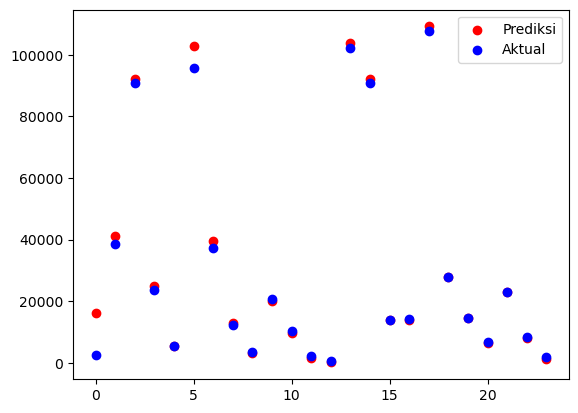

<Figure size 640x480 with 0 Axes>

In [25]:
a1 = range(len(Xtest))
plt.scatter(a1, pred, color='red')
plt.scatter(a1, ytest, color='blue')
plt.legend(["Prediksi", "Aktual"], loc ="upper right") 
plt.figure()

In [26]:
# Define the data as a list of dictionaries
new_data = [
    {'Tahun': 2023, 'Bulan': 'Januari', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Februari', 'Luas Lahan': 36637.27, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Maret', 'Luas Lahan': 35637.23, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'April', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Mei', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juni', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Juli', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Agustus', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'September', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Oktober', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'November', 'Luas Lahan': 35637.4, 'Luas Panen (ha)': 800},
    {'Tahun': 2023, 'Bulan': 'Desember', 'Luas Lahan': 1000, 'Luas Panen (ha)': 800}
]
# Create a DataFrame from the list of dictionaries
new_data = pd.DataFrame(data)

# Konversi data kategoris
new_data = pd.get_dummies(new_data, columns=['Bulan'])

# Gunakan model untuk memprediksi produksi padi
predicted_production = model.predict(new_data)

# Tampilkan hasil prediksi
print(f'Prediksi Produksi Padi: {predicted_production[0]}')

/home/kimp/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


ValueError: X has 16 features, but SVR is expecting 3 features as input.